In [4]:
"This is the Breast Cancer Winsconsin Data set. The target variable is the feature diagnosis" 
"The objective of this analysis is to develop a prediction model that can accurately"
"classify breast tumors as malignant or benign based upon a number of features within the data set."
"These features include information about the tumor such as:"
"radius, texture, perimeter, area, smoothness, compactness, concavity, symmetry, and fractal dimensions."


'radius, texture, perimeter, area, smoothness, compactness, concavity, symmetry, and fractal dimensions.'

In [5]:
"GitHub repository link: "

'GitHub repository link: '

In [6]:
%matplotlib inline
import pandas as pd
import numpy as np
import math
from sklearn import svm, datasets
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score, confusion_matrix 
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [7]:
df = pd.read_csv('Breast_Cancer.csv')

In [8]:
# View the size of the DataFrame
df_size = df.shape
print(df_size)
df.head()

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [10]:
#Find null values
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [11]:
df=df.drop(columns=['id','Unnamed: 32'])

In [12]:
df_dropped = df.dropna()
print(df_dropped)

    diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0           M        17.99         10.38          122.80     1001.0   
1           M        20.57         17.77          132.90     1326.0   
2           M        19.69         21.25          130.00     1203.0   
3           M        11.42         20.38           77.58      386.1   
4           M        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
564         M        21.56         22.39          142.00     1479.0   
565         M        20.13         28.25          131.20     1261.0   
566         M        16.60         28.08          108.30      858.1   
567         M        20.60         29.33          140.10     1265.0   
568         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              

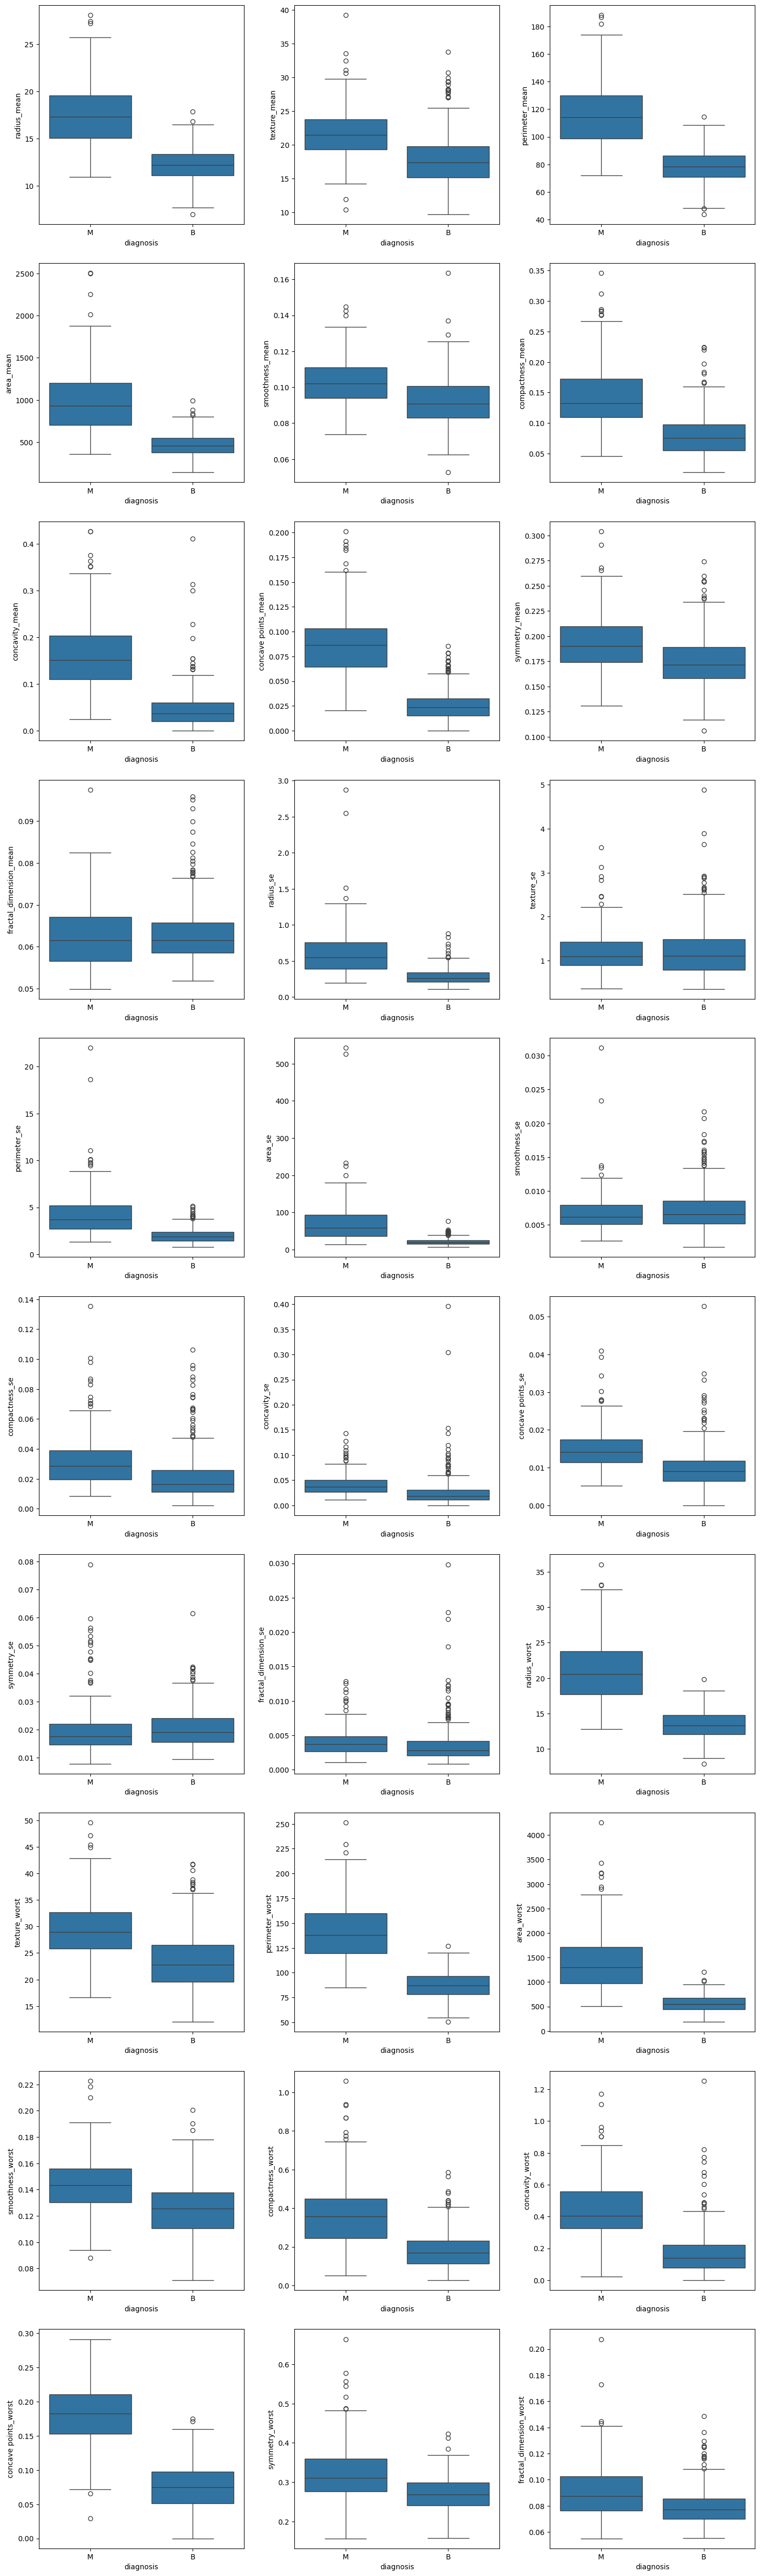

In [13]:
#Numeric features vs Target Boxplots
num_list=df_dropped.columns.drop(['diagnosis'])
num_features = len(num_list)

cols = 3
rows = math.ceil(num_features / cols)
fig=plt.figure(figsize=(15, rows * 5))

for i in range(len(num_list)):
    column=num_list[i]
    sub=fig.add_subplot(rows, cols, i + 1)
    sns.boxplot(x='diagnosis',y=column, data=df_dropped, ax=sub)

fig.tight_layout(pad=2.0)
plt.show()

In [14]:
#ANOVA test, drop all features except the top 5 features with best F-score, P-values, and the target variable.
from sklearn.feature_selection import SelectKBest, f_classif
pd.options.display.float_format='{:.6f}'.format

#Map diagnosis where M (malignant) = 1, and B (benign) = 0
df_dropped['diagnosis_result_numeric']=df_dropped['diagnosis'].map({'M':1, 'B':0})

X= df_dropped.drop(columns=['diagnosis', 'diagnosis_result_numeric'])
y= df_dropped['diagnosis_result_numeric']

#Select the top 5 features based upon F-scores
fs=SelectKBest(score_func=f_classif, k=5)
X_selected = fs.fit_transform(X,y)

#Store the top 5 F-score features in a variable
selected_feature_names = X.columns[fs.get_support()]

bestFeatures = fs.fit(X,y)
np.set_printoptions(suppress=True)
print("F-scores of the features:")
print(bestFeatures.scores_)
print("\nP-values of the features:")
print(bestFeatures.pvalues_)

#Organize the output
feature_scores = pd.DataFrame({
    'Feature':X.columns,
   'F-score':bestFeatures.scores_,
    'P-value': bestFeatures.pvalues_
}) 
feature_scores_sorted = feature_scores.sort_values(by=['F-score', 'P-value'], ascending=[False, True])
print(feature_scores_sorted)

F-scores of the features:
[646.98102098 118.09605934 697.23527248 573.06074657  83.65112341
 313.23307857 533.7931262  861.67602001  69.5274435    0.09345929
 268.84032697   0.0390947  253.89739178 243.65158578   2.5579678
  53.24733913  39.01448156 113.26275994   0.02411741   3.46827476
 860.78170699 149.59690469 897.94421886 661.60020553 122.47288046
 304.3410629  436.6919394  964.38539345 118.86023214  66.44396065]

P-values of the features:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.7599368  0.         0.84333203
 0.         0.         0.11029661 0.         0.         0.
 0.87664182 0.06307355 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.        ]
                    Feature    F-score  P-value
27     concave points_worst 964.385393 0.000000
22          perimeter_worst 897.944219 0.000000
7       concave points_mean 861.676020 0.000000
20             radius_worst 860.781707 0.000000

In [15]:
#Create a dataFrame containing the top 5 F-score features
X_top5 = pd.concat([X[selected_feature_names], df_dropped[['diagnosis_result_numeric']]], axis=1)

print("\nDataFrame with top 5 features selected:")
print(X_top5.head())


DataFrame with top 5 features selected:
   perimeter_mean  concave points_mean  radius_worst  perimeter_worst  \
0      122.800000             0.147100     25.380000       184.600000   
1      132.900000             0.070170     24.990000       158.800000   
2      130.000000             0.127900     23.570000       152.500000   
3       77.580000             0.105200     14.910000        98.870000   
4      135.100000             0.104300     22.540000       152.200000   

   concave points_worst  diagnosis_result_numeric  
0              0.265400                         1  
1              0.186000                         1  
2              0.243000                         1  
3              0.257500                         1  
4              0.162500                         1  


In [47]:
!pip install tensorflow


   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   - -------------------------------------- 11.8/390.3 MB 61.4 MB/s eta 0:00:07
   -- ------------------------------------- 28.8/390.3 MB 70.4 MB/s eta 0:00:06
   ---- ----------------------------------- 46.1/390.3 MB 73.4 MB/s eta 0:00:05
   ------ --------------------------------- 62.9/390.3 MB 75.7 MB/s eta 0:00:05
   -------- ------------------------------- 79.7/390.3 MB 77.0 MB/s eta 0:00:05
   ---------- ----------------------------- 97.8/390.3 MB 78.0 MB/s eta 0:00:04
   ----------- --------------------------- 115.3/390.3 MB 78.3 MB/s eta 0:00:04
   ------------- ------------------------- 132.4/390.3 MB 79.0 MB/s eta 0:00:04
   -------------- ------------------------ 148.9/390.3 MB 78.6 MB/s eta 0:00:04
   ---------------- ---------------------- 165.2/390.3 MB 78.2 MB/s eta 0:00:03
   ------------------ -------------------- 183.0/390.3 MB 79.0 MB/s eta 0:00:03
   -------------------- ------------------ 201.3/

In [58]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

# Split dataset into features (X) and target (y)
X = X_top5.drop(columns=['diagnosis_result_numeric'])
y = X_top5['diagnosis_result_numeric']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the ANN model
model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Input layer matching feature count
    Dense(16, activation='relu'),      # First hidden layer with 16 neurons
    Dense(8, activation='relu'),       # Second hidden layer with 8 neurons
    Dense(1, activation='sigmoid')     # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.2f}, Test Accuracy: {test_accuracy:.2f}")

# Save the model in the recommended .keras format
model.save("breast_cancer_ann_model.keras")

# Use @tf.function to optimize predictions
@tf.function
def predict_model(model, inputs):
    return model(inputs)

# Convert test data to tensor for prediction
X_test_tensor = tf.constant(X_test)

# Make predictions
predictions = predict_model(model, X_test_tensor).numpy()
predictions = (predictions > 0.5).astype(int)  # Convert probabilities to binary labels

# Confusion Matrix and Classification Report
cm = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, predictions))

# Calculate AUC-ROC score
auc = roc_auc_score(y_test, predictions)
print(f"\nAUC-ROC Score: {auc:.2f}")


Epoch 1/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8883 - loss: 0.6059 - val_accuracy: 0.9231 - val_loss: 0.5656
Epoch 2/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9416 - loss: 0.5671 - val_accuracy: 0.9341 - val_loss: 0.5199
Epoch 3/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9460 - loss: 0.5132 - val_accuracy: 0.9231 - val_loss: 0.4732
Epoch 4/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9419 - loss: 0.4669 - val_accuracy: 0.9341 - val_loss: 0.4269
Epoch 5/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9354 - loss: 0.4375 - val_accuracy: 0.9451 - val_loss: 0.3866
Epoch 6/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9085 - loss: 0.4063 - val_accuracy: 0.9341 - val_loss: 0.3509
Epoch 7/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9247 - loss: 0.3461 - val_accuracy: 0.9341 - val_loss: 0.3166
Epoch 8/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9364 - loss: 0.3185 - val_accuracy: 0.9451 - val_loss